In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature 
from sklearn import svm 
from sklearn import metrics
%matplotlib inline
import cv2
import seaborn as sns 

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
X_train, y_train = load_mnist('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-1/data', kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-1/data', kind='t10k')

labelNames = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

print(np.shape(X_train))
print(np.shape(X_test))

(60000, 784)
(10000, 784)


In [4]:
train_images = X_train[:10000].astype('float32') / 255.0 #last 10000 images
train_labels = y_train[:10000]

test_images = X_test[:1000].astype('float32') / 255.0 #last 1000 images
test_labels = y_test[:1000]

print(np.shape(train_images))
print(np.shape(test_images))

(10000, 784)
(1000, 784)


In [5]:
model = svm.SVC(C=.001 ,kernel='linear', random_state=42)

model.fit(X_train, y_train)

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [6]:
acc_train = model.score(X_train, y_train)
print('Train set accuracy: ', acc_train)

acc_test = model.score(X_test, y_test)
print('Test set accuracy: ', acc_test)

Train set accuracy:  0.98365
Test set accuracy:  0.9258


Test set predictions: [7 2 1 ... 4 5 6]
Test set Accuracy: 0.93
[[ 953    0    4    1    1   10    6    2    2    1]
 [   0 1119    6    2    0    1    1    1    5    0]
 [   9   12  949   11    9    5    6    9   17    5]
 [   5    2   19  939    0   17    3    7   13    5]
 [   2    1   19    1  928    1    4    4    3   19]
 [  14    6    4   41    7  781   14    1   20    4]
 [  11    3   15    1    9   27  889    0    3    0]
 [   2    7   22   22   12    1    0  939    4   19]
 [   8    7   13   29    7   24   10    5  859   12]
 [   5    5    3   13   45    5    1   17   13  902]]


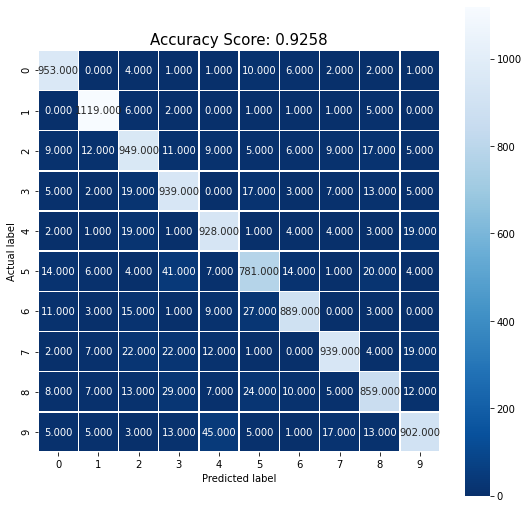

In [7]:
y_predicted=model.predict(X_test)
print("Test set predictions: {}".format(model.predict(X_test)))
print("Test set Accuracy: {:.2f}".format(model.score(X_test,y_test)))
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_test)
plt.title(all_sample_title, size = 15);